## Name: [Mazen Mobtasem Mohamed]
## ID: [18100142]

# <center><font color=darkred>Lab 6 </font>

# Lab Goals:
    1. Quick overview of some examples in lecture5.
    2. Work with hands-on examples such as: Boundary Extraction and Region Filling.

# <font color=darkred size=4>1-Needed Packages

In [ ]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage import data, io
from matplotlib import pyplot as plt
import numpy as np
from skimage.transform import rescale, resize
from skimage import img_as_ubyte,img_as_float
from skimage import data, io, filters
from matplotlib.pyplot import imshow, show, subplot, title, get_cmap
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.filters import threshold_otsu
from skimage.util import invert

## Task 1: Extract the boundary of horse image using Morphological operation ?

### Boundary Extraction:
      - Extracting the boundary (or outline) of an object is often extremely useful 
      - The boundary can be given simply as 
         β(A) = A – (A⊖B)  


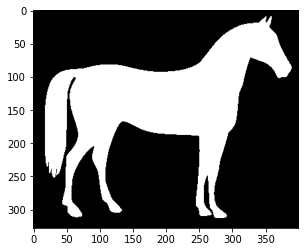

In [ ]:
img = invert(data.horse())
plt.imshow(img,'gray',vmin=0, vmax=1)
plt.show()

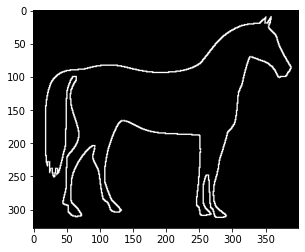

In [ ]:
def Erosion(img):
  img1 = np.copy(img)
  for i in range(5,img1.shape[0]-5):
    for j in range(5,img1.shape[1]-5):
      l1 = []
      l1.append(img[i][j])
      for k in range (3):
        l1.append(img[i+k][j])
        l1.append(img[i][j+k])
        l1.append(img[i-k][j])
        l1.append(img[i-k][j-k])
        l1.append(img[i+k][j-k])
        l1.append(img[i+k][j+k])
        l1.append(img[i-k][j+k])
      
      img1[i][j] = min(l1)
      output = img1
  return output
def boundary_extraction(img):
  return np.logical_xor(img ,Erosion(img))

plt.imshow(boundary_extraction(img),'gray',vmin=0, vmax=1);

## Task 2: Given a point inside the whole white circle, fill these black circle (Bonus)? 


### Region Filling:
      - The key equation for region filling is
        Xk = (Xk-1⊕ B)∩Ac           k=1,2,3..... 
      - Where X0 is simply the starting point inside the boundary, B is a simple structuring element 
        and Ac is the complement of A
      - This equation is applied repeatedly until Xk is equal to Xk-1 


### Image show:

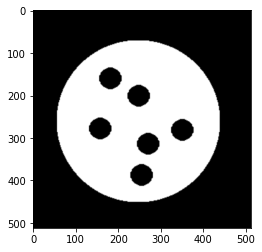

In [ ]:
img = io.imread('filling.gif')
image = resize(img, (512, 512))
plt.imshow(image, cmap=plt.cm.gray)

##Using closing

In [ ]:
def Erosion(img):
  img1 = np.copy(img)
  for i in range(20,img1.shape[0]-20):
    for j in range(20,img1.shape[1]-20):
      l1 = []
      l1.append(img[i][j])
      for k in range (20):
        l1.append(img[i+k][j])
        l1.append(img[i][j+k])
        l1.append(img[i-k][j])
        l1.append(img[i-k][j-k])
        l1.append(img[i+k][j-k])
        l1.append(img[i+k][j+k])
        l1.append(img[i-k][j+k])
      
      img1[i][j] = min(l1)
      output = img1
  return output
def Dilation(img):
  img1 = np.copy(img)
  for i in range(20,img1.shape[0]-20):
    for j in range(20,img1.shape[1]-20):
      l1 = []
      l1.append(img[i][j])
      for k in range (20):
        l1.append(img[i+k][j])
        l1.append(img[i][j+k])
        l1.append(img[i-k][j])
        l1.append(img[i-k][j-k])
        l1.append(img[i+k][j-k])
        l1.append(img[i+k][j+k])
        l1.append(img[i-k][j+k])
      
      img1[i][j] = max(l1)
      output = img1
  return output
def Closing(img):
  return Erosion(Dilation(img))

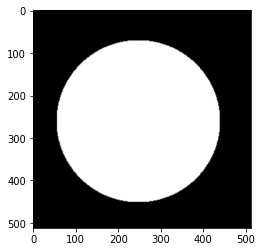

In [ ]:
plt.imshow(Closing(image), cmap=plt.cm.gray)

##Flood fill method

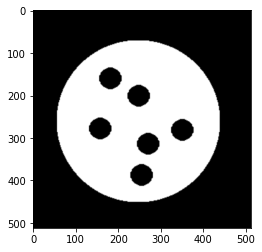

In [ ]:
plt.imshow(image, cmap=plt.cm.gray)

In [ ]:
image.max()

1.0

In [ ]:
from skimage.segmentation import flood, flood_fill
filled = flood_fill(image, (0,0), 1)

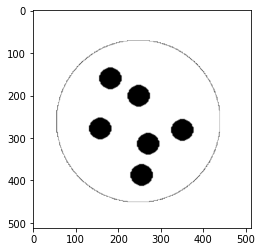

In [ ]:
plt.imshow(filled, cmap=plt.cm.gray)

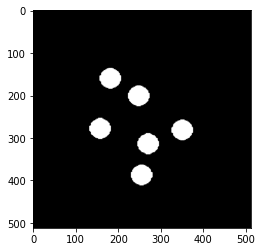

In [ ]:
filled = np.logical_not(filled)
plt.imshow(filled, cmap=plt.cm.gray)

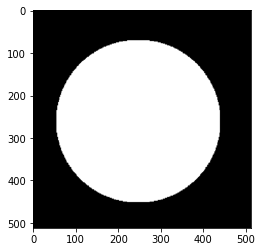

In [ ]:
final = np.logical_or(image,filled)
plt.imshow(final, cmap=plt.cm.gray)